# DATA COLLECTION

## IMPORTS AND INITIAL COLLECTION SETUP

In [9]:
import numpy as np
import pandas as pd
import nfl_data_py as nfl



In [22]:
years = list(range(2001, 2025))
print(f"collecting data for years: {years}")

print("collecting seasonal player data")
seasonal_data = nfl.import_seasonal_data(years, 'REG')
print(f"total seasonal records: {len(seasonal_data)}")
print(f"available columns in data: {list(seasonal_data.columns)}")

print("\ncollecting roster data")
roster_data = nfl.import_seasonal_rosters(years)
print(f"total roster records: {len(roster_data)}")
#filter to only qb, rb, wr, te records
target_positions = ['QB', 'RB', 'WR', 'TE']
roster_filtered = roster_data[roster_data['position'].isin(target_positions)].copy()
print(f"filtered to target positions: {len(roster_filtered)}")
print(f"target positions: {sorted(roster_filtered['position'].unique())}")

#merge roster data and seasonal data
print("\nMerging datasets")
#merge on player_id and season
merged_data = seasonal_data.merge(
    roster_filtered[['player_id', 'season', 'position', 'player_name']],
    on= ['player_id', 'season'],
    how='inner' #to keep only players with target positions
)
print(f"merged records: {len(merged_data)}")
print(f"positions in merged data: {sorted(merged_data['position'].unique())}")


collecting data for years: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
collecting seasonal player data
total seasonal records: 13988
available columns in data: ['player_id', 'season', 'season_type', 'completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards', 'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share', 'wop

## QB DATA COLLECTION

In [25]:
#QB DATA COLLECTION
print("processing qb data")
qb_data = merged_data[merged_data['position'] == 'QB'].copy()
#add threshold qualifier (>= 250 attempts)
qb_data['qualified_season'] = qb_data['attempts'] >= 250
#add derived metrics
qb_data['passing_yards_per_game'] = qb_data['passing_yards'] / qb_data['games']
qb_data['passing_tds_per_game'] = qb_data['passing_tds'] / qb_data['games']
qb_data['completion_percentage'] = np.where(qb_data['attempts'] > 0,
                                           qb_data['completions']/qb_data['attempts'], 0)

#reorder columns of merged dataset
qb_columns_ordered = ['player_id', 'player_name', 'season'] + [col for col in qb_data.columns
                                                              if col not in ['player_id', 'player_name', 'season']]

#save to csv
qb_data[qb_columns_ordered].to_csv('/Users/brucegavins/brady_supporting_cast_analysis/data/raw/qb_data_2001_2024.csv', index=False)
print(f"qb seasons saved: {len(qb_data)}")
print(f"qualified qb seasons: {qb_data['qualified_season'].sum():,}")



processing qb data
qb seasons saved: 1860
qualified qb seasons: 751


In [31]:
qb_csv=pd.read_csv('/Users/brucegavins/brady_supporting_cast_analysis/data/raw/qb_data_2001_2024.csv')

In [32]:
qb_csv.columns

Index(['player_id', 'player_name', 'season', 'season_type', 'completions',
       'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks',
       'sack_yards', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdf

## RUNNING BACK DATA COLLECTION

In [35]:
#RUNNING BACK DATA COLLECTION

rb_data = merged_data[merged_data['position'] == 'RB'].copy()

#derived metrics
rb_data['rushing_yards_per_game'] = rb_data['rushing_yards'] / rb_data['games']
rb_data['rushing_tds_per_game'] = rb_data['rushing_tds'] / rb_data['games']
rb_data['receiving_yards_per_game'] = rb_data['receiving_yards'] / rb_data['games']
rb_data['receiving_tds_per_game'] = rb_data['receiving_tds'] / rb_data['games']
rb_data['receptions_per_game'] = rb_data['receptions'] / rb_data['games']
rb_data['yards_per_carry'] = np.where(rb_data['carries'] > 0,
                                     rb_data['rushing_yards'] / rb_data['carries'], 0)

#reorder columns for final dataset
rb_columns_ordered = ['player_id', 'player_name', 'season', 'position'] + [col for col in rb_data.columns 
                                                                           if col not in ['player_id', 'player_name', 'season', 'position']]

#save final csv
rb_data[rb_columns_ordered].to_csv('/Users/brucegavins/brady_supporting_cast_analysis/data/raw/rb_data_2001_2024.csv', index=False)
print(f"RB seasons saved: {len(rb_data):,}")


RB seasons saved: 3,385


## WIDE RECEIVER DATA COLLECTION

In [37]:
#filter to only players with position wr
wr_data = merged_data[merged_data['position'] == 'WR'].copy()

# Add derived metrics
wr_data['receiving_yards_per_game'] = wr_data['receiving_yards'] / wr_data['games']
wr_data['receiving_tds_per_game'] = wr_data['receiving_tds'] / wr_data['games']
wr_data['receptions_per_game'] = wr_data['receptions'] / wr_data['games']
wr_data['yards_per_reception'] = np.where(wr_data['receptions'] > 0,
                                         wr_data['receiving_yards'] / wr_data['receptions'], 0)
wr_data['catch_rate'] = np.where(wr_data['targets'] > 0,
                                wr_data['receptions'] / wr_data['targets'], 0)

#reorder columns for final dataset
wr_columns_ordered = ['player_id', 'player_name', 'season', 'position'] + [col for col in wr_data.columns 
                                                                           if col not in ['player_id', 'player_name', 'season', 'position']]

#save final data
wr_data[wr_columns_ordered].to_csv('/Users/brucegavins/brady_supporting_cast_analysis/data/raw/wr_data_2001_2024.csv', index=False)
print(f"WR seasons saved: {len(wr_data):,}")

WR seasons saved: 4,856


## TIGHT END DATA COLLECTION

In [39]:
#filter to just players with 'TE' in 'position'
te_data = merged_data[merged_data['position'] == 'TE'].copy()

# Add derived metrics
te_data['receiving_yards_per_game'] = te_data['receiving_yards'] / te_data['games']
te_data['receiving_tds_per_game'] = te_data['receiving_tds'] / te_data['games']
te_data['receptions_per_game'] = te_data['receptions'] / te_data['games']
te_data['yards_per_reception'] = np.where(te_data['receptions'] > 0,
                                         te_data['receiving_yards'] / te_data['receptions'], 0)
te_data['catch_rate'] = np.where(te_data['targets'] > 0,
                                te_data['receptions'] / te_data['targets'], 0)

#reorder columns for final dataset
te_columns_ordered = ['player_id', 'player_name', 'season', 'position'] + [col for col in te_data.columns 
                                                                           if col not in ['player_id', 'player_name', 'season', 'position']]

#save to csv
te_data[te_columns_ordered].to_csv('/Users/brucegavins/brady_supporting_cast_analysis/data/raw/te_data_2001_2024.csv', index=False)
print(f"TE seasons saved: {len(te_data):,}")

TE seasons saved: 2,620


## TEAM DEFENSE DATA COLLECTION

- uses per play data for defense collection, rather than seasonal stats
- groups by particular stats
- multiplies stat totals by games played for season totals
- only includes regular season stats

In [40]:
pbp_data = nfl.import_pbp_data(years)
pbp_regular = pbp_data[pbp_data['season_type'] == 'REG'].copy()

# Calculate basic defensive stats
defensive_stats = pbp_regular.groupby(['defteam', 'season']).agg({
    'sack': 'sum',
    'interception': 'sum',
    'fumble_lost': 'sum',
    'yards_gained': 'sum',
    'play_id': 'count',
    'game_id': 'nunique'
}).reset_index()

defensive_stats.rename(columns={
    'defteam': 'team',
    'sack': 'sacks_total',
    'interception': 'interceptions_total',
    'fumble_lost': 'fumbles_recovered_total',
    'yards_gained': 'yards_allowed_total',
    'play_id': 'plays_faced_total',
    'game_id': 'games_played'
}, inplace=True)

# Calculate per-game metrics
defensive_stats['sacks_per_game'] = defensive_stats['sacks_total'] / defensive_stats['games_played']
defensive_stats['takeaways_per_game'] = (defensive_stats['interceptions_total'] + 
                                       defensive_stats['fumbles_recovered_total']) / defensive_stats['games_played']
defensive_stats['yards_allowed_per_game'] = defensive_stats['yards_allowed_total'] / defensive_stats['games_played']

defensive_stats.to_csv('/Users/brucegavins/brady_supporting_cast_analysis/data/raw/defense_data_2001_2024.csv', index=False)
print(f"Defense team-seasons saved: {len(defensive_stats):,}")

2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.
Defense team-seasons saved: 767


# Z-SCORING AND COMPOSITES

## QUARTERBACKS

In [2]:
qb_data.columns

Index(['player_id', 'player_name', 'season', 'season_type', 'completions',
       'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks',
       'sack_yards', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdf

In [6]:
import pandas as pd
import numpy as np
from scipy import stats

qb_data = pd.read_csv('/Users/brucegavins/projects/brady_supporting_cast_analysis/data/raw/qb_data_2001_2024.csv')

qb_qualified = qb_data[qb_data['qualified_season'] == True].copy()
print(f"qualified qb seasons: {len('qualified_season')}")

# Calculate z-scores by season for QB metrics
qb_metrics_zscore = qb_qualified.groupby('season').apply(
    lambda group: pd.DataFrame({
        'player_id': group['player_id'],
        'player_name': group['player_name'],
        'season': group['season'],
        'position': group['position'],
        'games': group['games'],
        
        # Original metrics
        'passing_yards_per_game': group['passing_yards_per_game'],
        'passing_tds_per_game': group['passing_tds_per_game'],
        'completion_percentage': group['completion_percentage'],
        'rushing_yards_per_game': group['rushing_yards'] / group['games'],
        'rushing_tds_per_game': group['rushing_tds'] / group['games'],
        'interceptions_per_game': group['interceptions'] / group['games'],
        'attempts': group['attempts'],
        
        # Z-scored metrics
        'passing_yards_per_game_z': stats.zscore(group['passing_yards_per_game']),
        'passing_tds_per_game_z': stats.zscore(group['passing_tds_per_game']),
        'completion_percentage_z': stats.zscore(group['completion_percentage']),
        'rushing_yards_per_game_z': stats.zscore(group['rushing_yards'] / group['games']),
        'rushing_tds_per_game_z': stats.zscore(group['rushing_tds'] / group['games']),
        'interceptions_per_game_z': stats.zscore(group['interceptions'] / group['games'])
    })
).reset_index(drop=True)

#Calculate qb composite score 
#use negative weighting for interceptions/game
qb_metrics_zscore['qb_composite_score_z'] = (
            0.35 * qb_metrics_zscore['passing_yards_per_game_z'] +
            0.25 * qb_metrics_zscore['passing_tds_per_game_z'] +
            0.20 * qb_metrics_zscore['completion_percentage_z'] +
            0.15 * qb_metrics_zscore['rushing_yards_per_game_z'] +
            0.10 * qb_metrics_zscore['rushing_tds_per_game_z'] -
            0.20 * qb_metrics_zscore['interceptions_per_game_z']
)       

#calculate value above replacement (20th percentile baseline)
qb_metrics_zscore['qb_value_above_replacement_z'] = qb_metrics_zscore.groupby('season')['qb_composite_score_z'].transform(
    lambda x: x - x.quantile(0.2)
)

qb_metrics_zscore.to_csv('/Users/brucegavins/projects/brady_supporting_cast_analysis/data/processed/qb_zscore_composite_2001_2024.csv', index=False)
print(f"processed {len(qb_metrics_zscore)} qualified qb seasons")


qualified qb seasons: 16
processed 751 qualified qb seasons


/var/folders/nf/zsch_w8n2tbbqhl84qkhbjy00000gn/T/ipykernel_5407/3493344713.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  qb_metrics_zscore = qb_qualified.groupby('season').apply(


Loading QB z-score composite data...
QB composite score records: 751
20th percentile baseline composite score: -0.646
Average yearly 20th percentile: -0.617
Tom Brady: 0.723 (21 seasons)
Drew Brees: 0.870 (19 seasons)
Patrick Mahomes: 1.002 (7 seasons)
Peyton Manning: 0.915 (14 seasons)
Josh Allen: 0.406 (7 seasons)
Lamar Jackson: 0.643 (6 seasons)

QB Career Averages vs Baseline (-0.646):
Patrick Mahomes:  1.002 (+1.648 above baseline)
Peyton Manning :  0.915 (+1.561 above baseline)
Drew Brees     :  0.870 (+1.516 above baseline)
Tom Brady      :  0.723 (+1.369 above baseline)
Lamar Jackson  :  0.643 (+1.289 above baseline)
Josh Allen     :  0.406 (+1.052 above baseline)


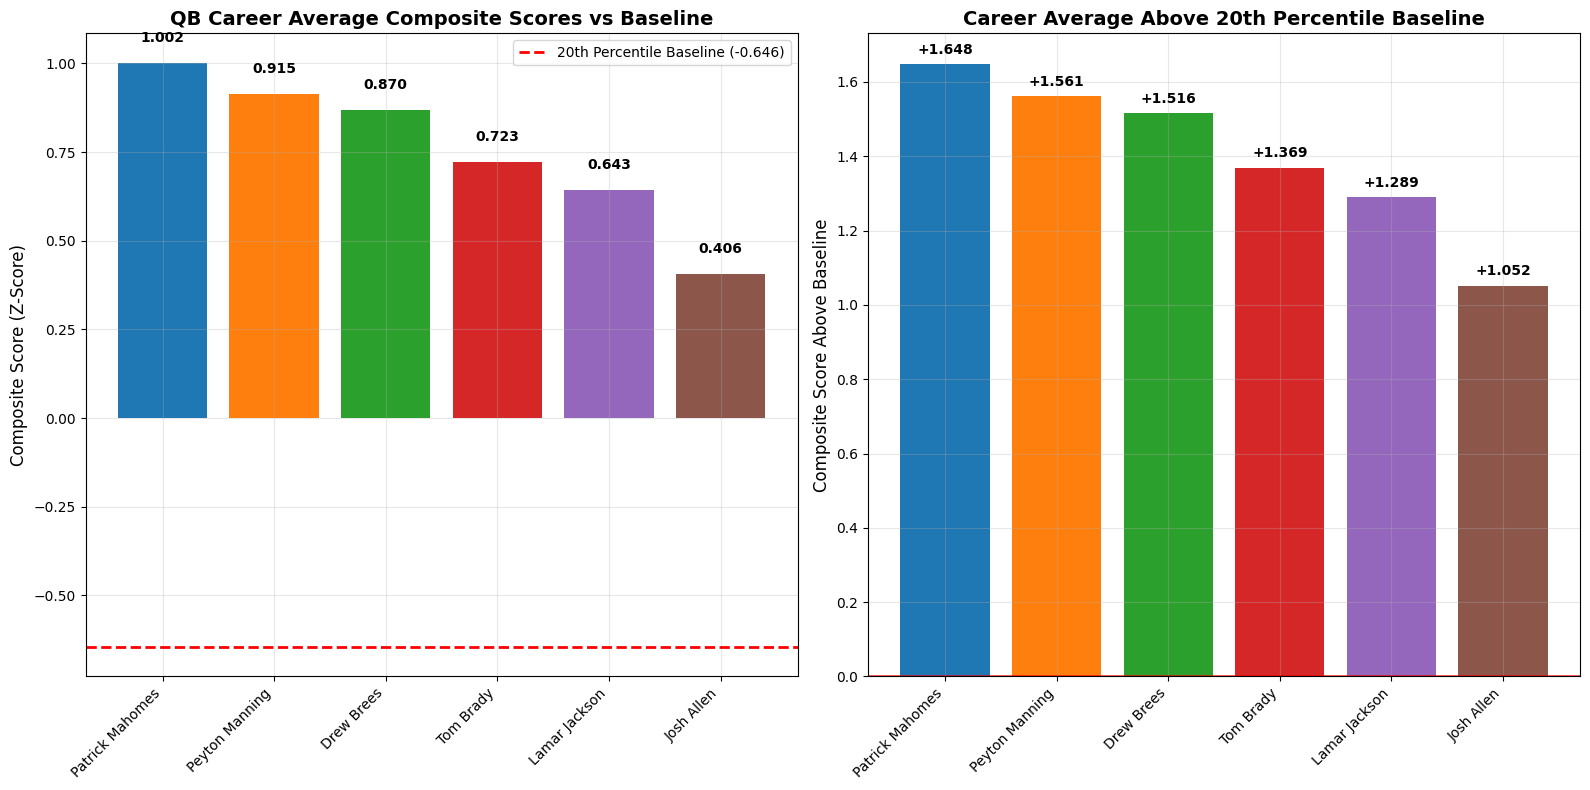

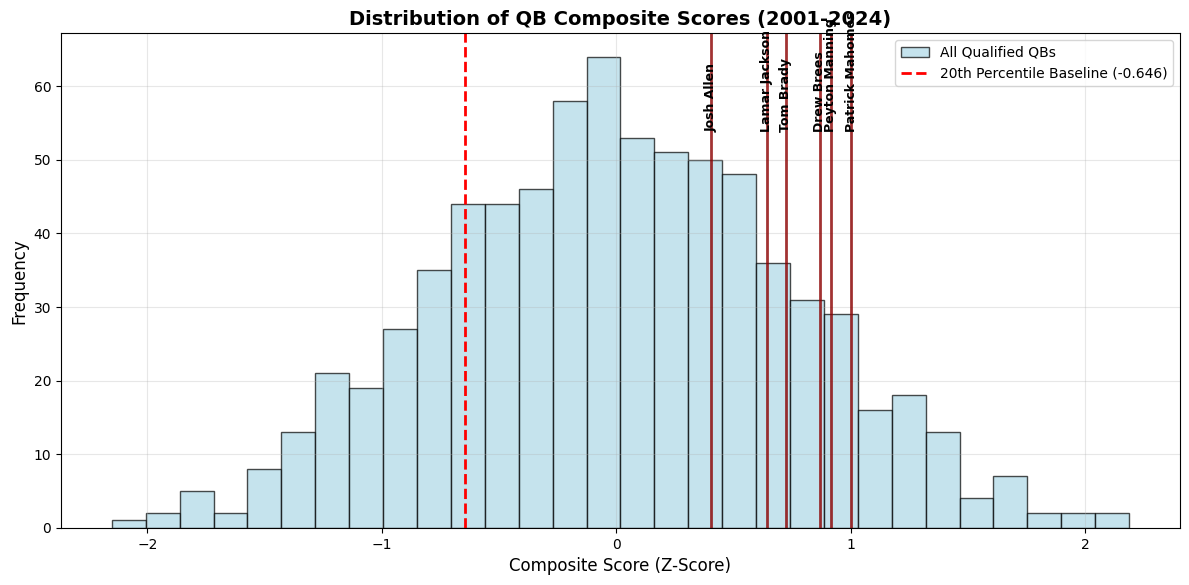


Plots saved:
- results/figures/qb_baseline_comparison.png
- results/figures/qb_score_distribution.png

ELITE QB PERFORMANCE SUMMARY
20th Percentile Baseline: -0.646

Rankings:
1. Patrick Mahomes:  1.002 (7 seasons)
2. Peyton Manning :  0.915 (14 seasons)
3. Drew Brees     :  0.870 (19 seasons)
4. Tom Brady      :  0.723 (21 seasons)
5. Lamar Jackson  :  0.643 (6 seasons)
6. Josh Allen     :  0.406 (7 seasons)


In [8]:
# visualize qb composite score baseline versus elite qb career average composites to verify validity of metrics

"""
QB Baseline vs Elite QBs Comparison
Shows where elite QBs rank against 20th percentile baseline composite score
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the QB z-score composite data
print("Loading QB z-score composite data...")
qb_zscore = pd.read_csv('/Users/brucegavins/projects/brady_supporting_cast_analysis/data/processed/qb_zscore_composite_2001_2024.csv')
print(f"QB composite score records: {len(qb_zscore):,}")

# Calculate the baseline (20th percentile) composite score for the entire period
baseline_score = qb_zscore['qb_composite_score_z'].quantile(0.2)
print(f"20th percentile baseline composite score: {baseline_score:.3f}")

# Calculate average baseline by year to see trend
yearly_baseline = qb_zscore.groupby('season')['qb_composite_score_z'].quantile(0.2).mean()
print(f"Average yearly 20th percentile: {yearly_baseline:.3f}")

# Define the QBs we want to analyze
target_qbs = [
    'Tom Brady',
    'Drew Brees', 
    'Patrick Mahomes',
    'Peyton Manning',
    'Josh Allen',
    'Lamar Jackson'
]

# Calculate career average composite scores for each QB
qb_career_averages = []
for qb_name in target_qbs:
    qb_data = qb_zscore[qb_zscore['player_name'] == qb_name]
    if len(qb_data) > 0:
        career_avg = qb_data['qb_composite_score_z'].mean()
        seasons = len(qb_data)
        qb_career_averages.append({
            'QB': qb_name,
            'Career_Avg_Composite': career_avg,
            'Seasons': seasons,
            'Above_Baseline': career_avg - baseline_score
        })
        print(f"{qb_name}: {career_avg:.3f} ({seasons} seasons)")
    else:
        print(f"{qb_name}: NOT FOUND")

# Convert to DataFrame
qb_comparison = pd.DataFrame(qb_career_averages)
qb_comparison = qb_comparison.sort_values('Career_Avg_Composite', ascending=False)

print(f"\nQB Career Averages vs Baseline ({baseline_score:.3f}):")
for _, row in qb_comparison.iterrows():
    print(f"{row['QB']:<15}: {row['Career_Avg_Composite']:>6.3f} (+{row['Above_Baseline']:>5.3f} above baseline)")

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left plot: Bar chart of career averages vs baseline
bars = ax1.bar(range(len(qb_comparison)), qb_comparison['Career_Avg_Composite'], 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add baseline line
ax1.axhline(y=baseline_score, color='red', linestyle='--', linewidth=2, 
            label=f'20th Percentile Baseline ({baseline_score:.3f})')

# Formatting for left plot
ax1.set_title('QB Career Average Composite Scores vs Baseline', fontsize=14, fontweight='bold')
ax1.set_ylabel('Composite Score (Z-Score)', fontsize=12)
ax1.set_xticks(range(len(qb_comparison)))
ax1.set_xticklabels(qb_comparison['QB'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, qb_comparison['Career_Avg_Composite'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{value:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Right plot: Above baseline values
above_baseline_bars = ax2.bar(range(len(qb_comparison)), qb_comparison['Above_Baseline'],
                              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add zero line
ax2.axhline(y=0, color='red', linestyle='-', linewidth=2, alpha=0.7)

# Formatting for right plot  
ax2.set_title('Career Average Above 20th Percentile Baseline', fontsize=14, fontweight='bold')
ax2.set_ylabel('Composite Score Above Baseline', fontsize=12)
ax2.set_xticks(range(len(qb_comparison)))
ax2.set_xticklabels(qb_comparison['QB'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(above_baseline_bars, qb_comparison['Above_Baseline'])):
    height = bar.get_height()
    label_y = height + 0.02 if height >= 0 else height - 0.05
    ax2.text(bar.get_x() + bar.get_width()/2., label_y,
             f'+{value:.3f}', ha='center', va='bottom' if height >= 0 else 'top', 
             fontsize=10, fontweight='bold')

plt.tight_layout()

# Save the plot
plt.savefig('/Users/brucegavins/projects/brady_supporting_cast_analysis/results/figures/qb_baseline_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis: Show distribution of all QBs
plt.figure(figsize=(12, 6))

# Histogram of all QB composite scores
plt.hist(qb_zscore['qb_composite_score_z'], bins=30, alpha=0.7, color='lightblue', 
         edgecolor='black', label='All Qualified QBs')

# Mark baseline
plt.axvline(x=baseline_score, color='red', linestyle='--', linewidth=2, 
            label=f'20th Percentile Baseline ({baseline_score:.3f})')

# Mark elite QBs
for _, row in qb_comparison.iterrows():
    plt.axvline(x=row['Career_Avg_Composite'], color='darkred', linewidth=2, alpha=0.8)
    plt.text(row['Career_Avg_Composite'], plt.ylim()[1]*0.8, row['QB'], 
             rotation=90, ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Distribution of QB Composite Scores (2001-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Composite Score (Z-Score)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig('/Users/brucegavins/projects/brady_supporting_cast_analysis/results/figures/qb_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlots saved:")
print("- results/figures/qb_baseline_comparison.png")
print("- results/figures/qb_score_distribution.png")

# Summary table
print(f"\n{'='*60}")
print("ELITE QB PERFORMANCE SUMMARY")
print(f"{'='*60}")
print(f"20th Percentile Baseline: {baseline_score:.3f}")
print(f"\nRankings:")
for i, (_, row) in enumerate(qb_comparison.iterrows(), 1):
    print(f"{i}. {row['QB']:<15}: {row['Career_Avg_Composite']:>6.3f} ({row['Seasons']} seasons)")

Loading QB data with EPA...
Qualified QBs with EPA data: 751
QB composite score records: 751
Composite score 20th percentile baseline: -0.646
Passing EPA 20th percentile baseline: -26.045
Tom Brady: Composite 0.723, EPA 111.752
Drew Brees: Composite 0.870, EPA 103.298
Patrick Mahomes: Composite 1.002, EPA 142.710
Peyton Manning: Composite 0.915, EPA 138.051
Josh Allen: Composite 0.406, EPA 73.746
Lamar Jackson: Composite 0.643, EPA 77.006


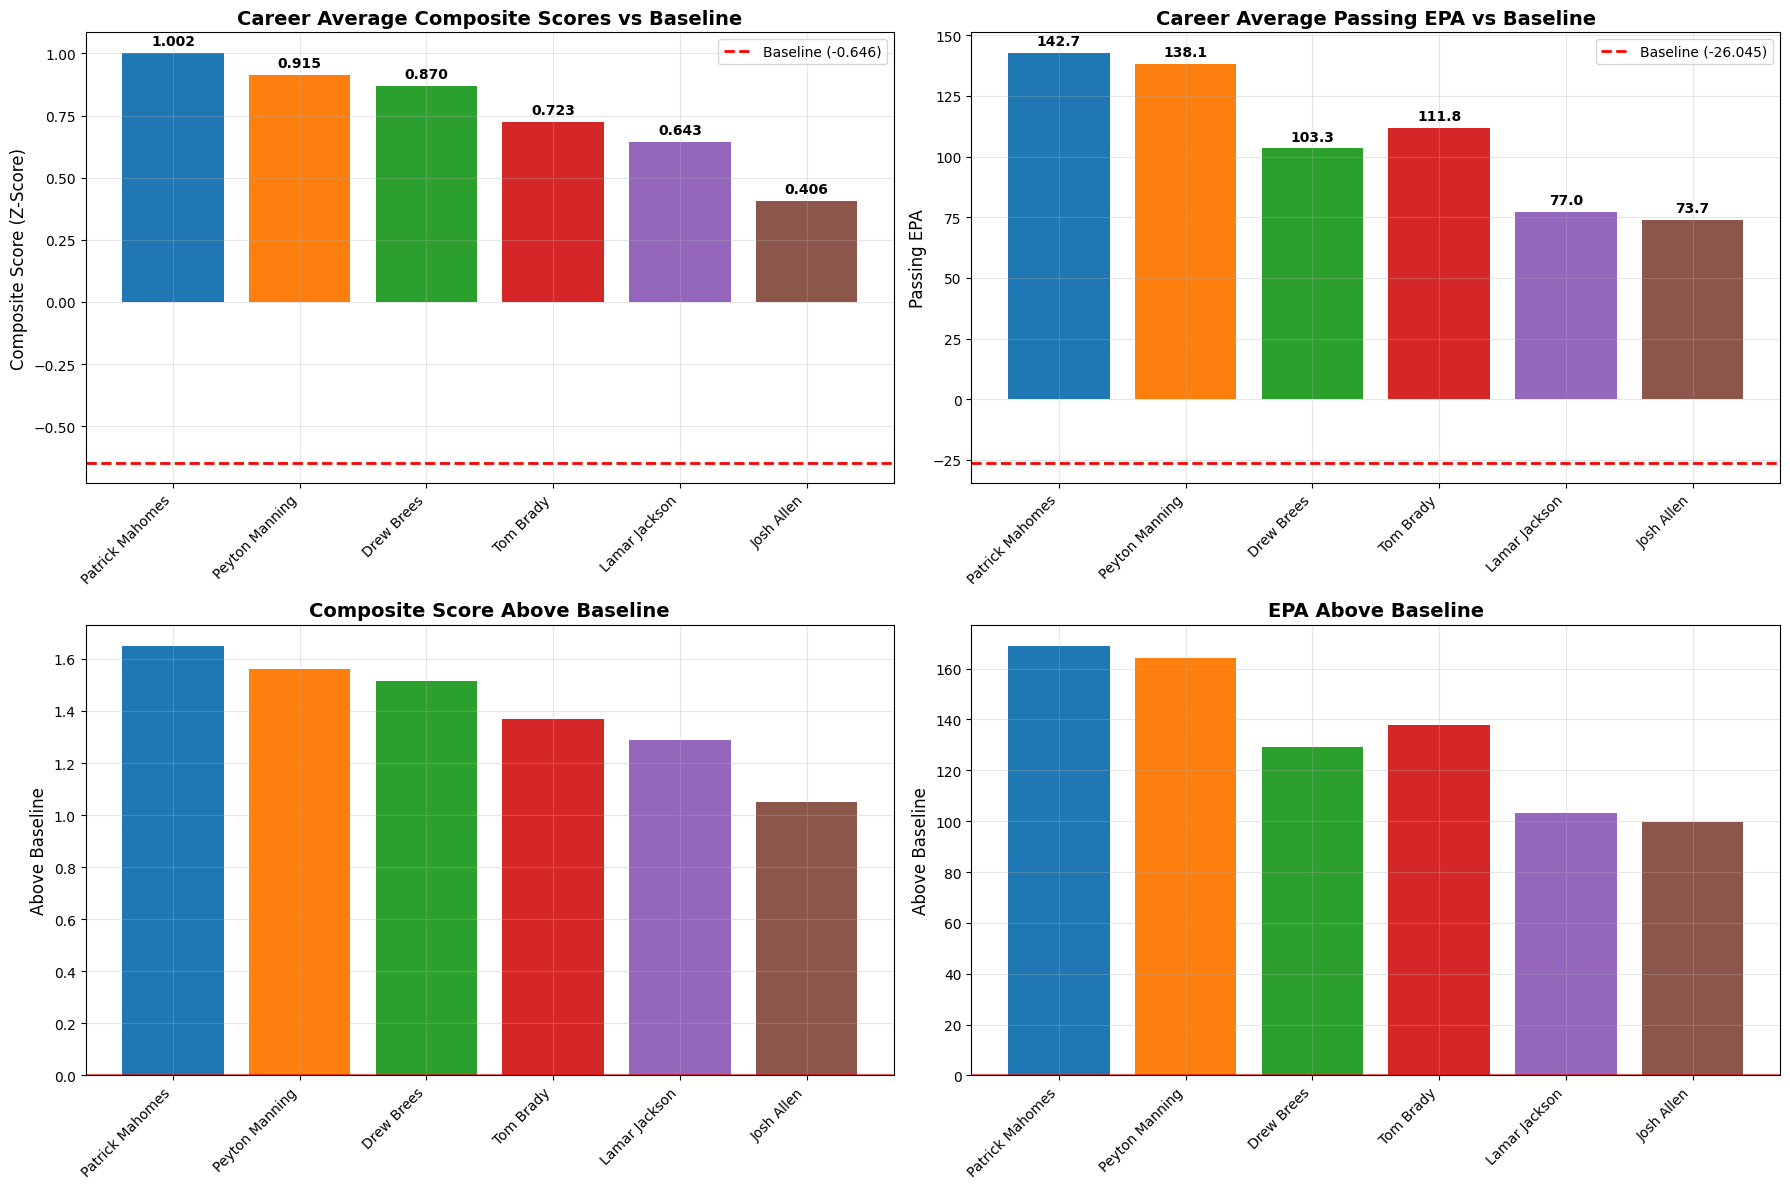


COMPOSITE SCORE VALIDATION AGAINST EPA

Rankings by Composite Score:
1. Patrick Mahomes:  1.648
2. Peyton Manning :  1.561
3. Drew Brees     :  1.516
4. Tom Brady      :  1.369
5. Lamar Jackson  :  1.289
6. Josh Allen     :  1.052

Rankings by EPA:
1. Patrick Mahomes:  168.8
2. Peyton Manning :  164.1
3. Tom Brady      :  137.8
4. Drew Brees     :  129.3
5. Lamar Jackson  :  103.1
6. Josh Allen     :   99.8

Correlation between metrics:
Pearson correlation: 0.888
P-value: 0.018053
R-squared: 0.789


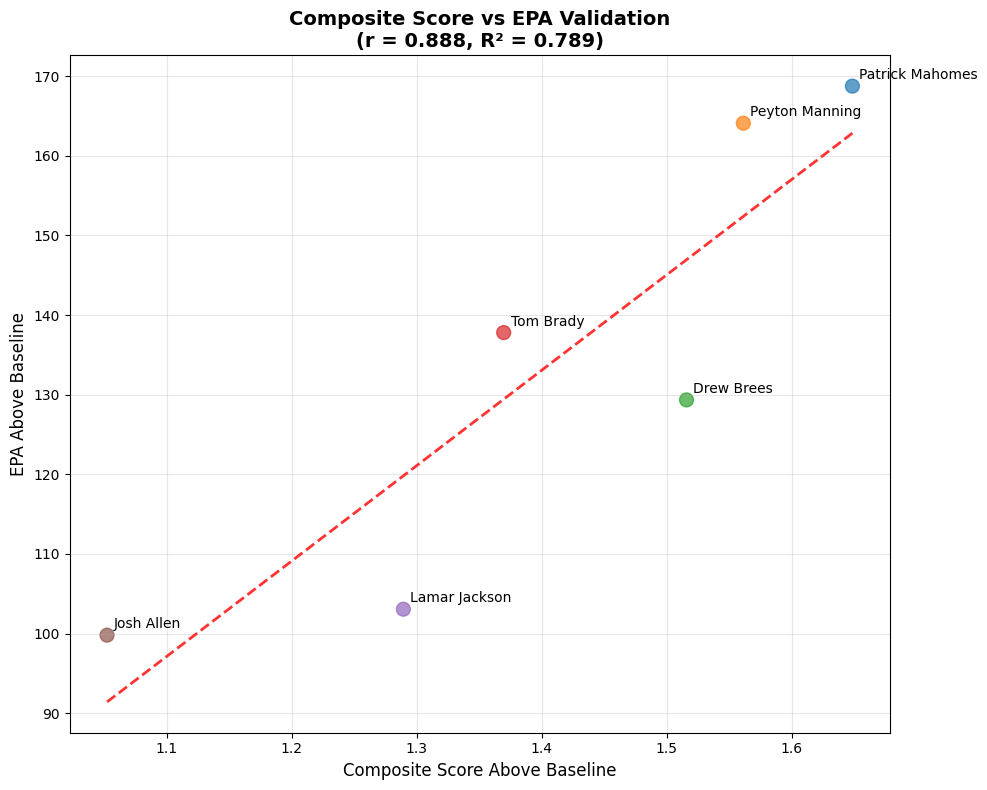


Plots saved:
- results/figures/qb_composite_vs_epa_validation.png
- results/figures/composite_epa_correlation.png
Patrick Mahomes: Composite rank 1, EPA rank 1, Difference: 0
Peyton Manning: Composite rank 2, EPA rank 2, Difference: 0
Drew Brees: Composite rank 3, EPA rank 4, Difference: 1
Tom Brady: Composite rank 4, EPA rank 3, Difference: 1
Lamar Jackson: Composite rank 5, EPA rank 5, Difference: 0
Josh Allen: Composite rank 6, EPA rank 6, Difference: 0

Average rank difference: 0.3 positions


In [9]:
"""
QB EPA Baseline Validation vs Composite Score
Validates our custom composite metric against professional passing EPA metric
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the QB data with EPA
print("Loading QB data with EPA...")
qb_data = pd.read_csv('/Users/brucegavins/projects/brady_supporting_cast_analysis/data/raw/qb_data_2001_2024.csv')
qualified_qbs = qb_data[qb_data['qualified_season'] == True].copy()
qualified_qbs = qualified_qbs.dropna(subset=['passing_epa'])
print(f"Qualified QBs with EPA data: {len(qualified_qbs):,}")

# Load composite scores
qb_zscore = pd.read_csv('/Users/brucegavins/projects/brady_supporting_cast_analysis/data/processed/qb_zscore_composite_2001_2024.csv')
print(f"QB composite score records: {len(qb_zscore):,}")

# Calculate baselines for both metrics
composite_baseline = qb_zscore['qb_composite_score_z'].quantile(0.2)
epa_baseline = qualified_qbs['passing_epa'].quantile(0.2)

print(f"Composite score 20th percentile baseline: {composite_baseline:.3f}")
print(f"Passing EPA 20th percentile baseline: {epa_baseline:.3f}")

# Define the QBs we want to analyze
target_qbs = [
    'Tom Brady',
    'Drew Brees', 
    'Patrick Mahomes',
    'Peyton Manning',
    'Josh Allen',
    'Lamar Jackson'
]

# Calculate career averages for both metrics
qb_comparison = []
for qb_name in target_qbs:
    # Composite score data
    composite_data = qb_zscore[qb_zscore['player_name'] == qb_name]
    # EPA data
    epa_data = qualified_qbs[qualified_qbs['player_name'] == qb_name]
    
    if len(composite_data) > 0 and len(epa_data) > 0:
        composite_avg = composite_data['qb_composite_score_z'].mean()
        epa_avg = epa_data['passing_epa'].mean()
        
        qb_comparison.append({
            'QB': qb_name,
            'Composite_Avg': composite_avg,
            'EPA_Avg': epa_avg,
            'Composite_Above_Baseline': composite_avg - composite_baseline,
            'EPA_Above_Baseline': epa_avg - epa_baseline,
            'Composite_Seasons': len(composite_data),
            'EPA_Seasons': len(epa_data)
        })
        print(f"{qb_name}: Composite {composite_avg:.3f}, EPA {epa_avg:.3f}")
    else:
        print(f"{qb_name}: Missing data")

# Convert to DataFrame and sort by composite score
comparison_df = pd.DataFrame(qb_comparison)
comparison_df = comparison_df.sort_values('Composite_Avg', ascending=False)

# Create the comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Colors for consistency
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot 1: Composite scores vs baseline
bars1 = ax1.bar(range(len(comparison_df)), comparison_df['Composite_Avg'], color=colors)
ax1.axhline(y=composite_baseline, color='red', linestyle='--', linewidth=2, 
            label=f'Baseline ({composite_baseline:.3f})')
ax1.set_title('Career Average Composite Scores vs Baseline', fontsize=14, fontweight='bold')
ax1.set_ylabel('Composite Score (Z-Score)', fontsize=12)
ax1.set_xticks(range(len(comparison_df)))
ax1.set_xticklabels(comparison_df['QB'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add value labels
for bar, value in zip(bars1, comparison_df['Composite_Avg']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: EPA vs baseline
bars2 = ax2.bar(range(len(comparison_df)), comparison_df['EPA_Avg'], color=colors)
ax2.axhline(y=epa_baseline, color='red', linestyle='--', linewidth=2, 
            label=f'Baseline ({epa_baseline:.3f})')
ax2.set_title('Career Average Passing EPA vs Baseline', fontsize=14, fontweight='bold')
ax2.set_ylabel('Passing EPA', fontsize=12)
ax2.set_xticks(range(len(comparison_df)))
ax2.set_xticklabels(comparison_df['QB'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add value labels
for bar, value in zip(bars2, comparison_df['EPA_Avg']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{value:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 3: Above baseline comparison - Composite
bars3 = ax3.bar(range(len(comparison_df)), comparison_df['Composite_Above_Baseline'], color=colors)
ax3.axhline(y=0, color='red', linestyle='-', linewidth=2, alpha=0.7)
ax3.set_title('Composite Score Above Baseline', fontsize=14, fontweight='bold')
ax3.set_ylabel('Above Baseline', fontsize=12)
ax3.set_xticks(range(len(comparison_df)))
ax3.set_xticklabels(comparison_df['QB'], rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

# Plot 4: Above baseline comparison - EPA
bars4 = ax4.bar(range(len(comparison_df)), comparison_df['EPA_Above_Baseline'], color=colors)
ax4.axhline(y=0, color='red', linestyle='-', linewidth=2, alpha=0.7)
ax4.set_title('EPA Above Baseline', fontsize=14, fontweight='bold')
ax4.set_ylabel('Above Baseline', fontsize=12)
ax4.set_xticks(range(len(comparison_df)))
ax4.set_xticklabels(comparison_df['QB'], rotation=45, ha='right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/brucegavins/projects/brady_supporting_cast_analysis/results/figures/qb_composite_vs_epa_validation.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation analysis
correlation = stats.pearsonr(comparison_df['Composite_Above_Baseline'], 
                           comparison_df['EPA_Above_Baseline'])

print(f"\n{'='*60}")
print("COMPOSITE SCORE VALIDATION AGAINST EPA")
print(f"{'='*60}")

# Rankings comparison
print(f"\nRankings by Composite Score:")
for i, (_, row) in enumerate(comparison_df.iterrows(), 1):
    print(f"{i}. {row['QB']:<15}: {row['Composite_Above_Baseline']:>6.3f}")

# Sort by EPA for comparison
epa_sorted = comparison_df.sort_values('EPA_Above_Baseline', ascending=False)
print(f"\nRankings by EPA:")
for i, (_, row) in enumerate(epa_sorted.iterrows(), 1):
    print(f"{i}. {row['QB']:<15}: {row['EPA_Above_Baseline']:>6.1f}")

print(f"\nCorrelation between metrics:")
print(f"Pearson correlation: {correlation[0]:.3f}")
print(f"P-value: {correlation[1]:.6f}")
print(f"R-squared: {correlation[0]**2:.3f}")

# Create scatter plot to visualize correlation
plt.figure(figsize=(10, 8))
plt.scatter(comparison_df['Composite_Above_Baseline'], comparison_df['EPA_Above_Baseline'], 
           s=100, c=colors[:len(comparison_df)], alpha=0.7)

# Add QB labels
for _, row in comparison_df.iterrows():
    plt.annotate(row['QB'], 
                (row['Composite_Above_Baseline'], row['EPA_Above_Baseline']),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

# Add trend line
z = np.polyfit(comparison_df['Composite_Above_Baseline'], comparison_df['EPA_Above_Baseline'], 1)
p = np.poly1d(z)
x_trend = np.linspace(comparison_df['Composite_Above_Baseline'].min(), 
                     comparison_df['Composite_Above_Baseline'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)

plt.xlabel('Composite Score Above Baseline', fontsize=12)
plt.ylabel('EPA Above Baseline', fontsize=12)
plt.title(f'Composite Score vs EPA Validation\n(r = {correlation[0]:.3f}, R² = {correlation[0]**2:.3f})', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/brucegavins/projects/brady_supporting_cast_analysis/results/figures/composite_epa_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlots saved:")
print("- results/figures/qb_composite_vs_epa_validation.png")
print("- results/figures/composite_epa_correlation.png")

# Check if rankings are similar
composite_ranks = comparison_df.reset_index(drop=True)['QB'].tolist()
epa_ranks = epa_sorted.reset_index(drop=True)['QB'].tolist()

rank_differences = []
for qb in composite_ranks:
    composite_rank = composite_ranks.index(qb) + 1
    epa_rank = epa_ranks.index(qb) + 1
    diff = abs(composite_rank - epa_rank)
    rank_differences.append(diff)
    print(f"{qb}: Composite rank {composite_rank}, EPA rank {epa_rank}, Difference: {diff}")

avg_rank_diff = np.mean(rank_differences)
print(f"\nAverage rank difference: {avg_rank_diff:.1f} positions")

## RUNNING BACKS

## WIDE RECEIVERS

## TIGHT ENDS 

## TEAM DEFENSE

# BRADY ANALYSIS

## BY SEASON LEAGUE AVERAGE PASSING EPA VS BRADY PASSING EPA

Qualified QB seasons: 751
QBs with valid passing EPA: 751
League averages calculated for 24 seasons
Tom Brady seasons found: 21

Brady vs League Average Summary:
Seasons above league average: 19
Seasons below league average: 2


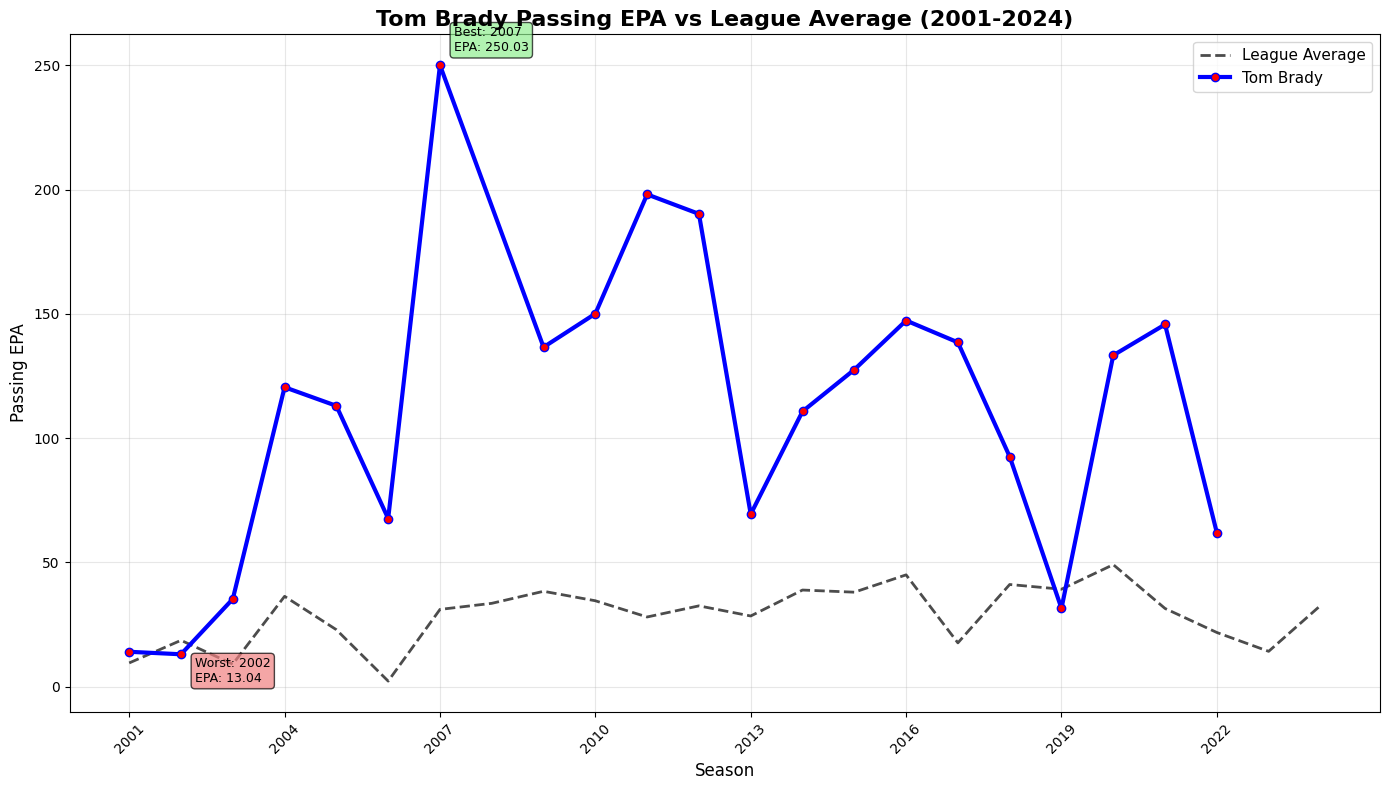

In [48]:
"""
Tom Brady vs League Average passing EPA analysis
Calculates league average passing EPA by season then compares to Brady's passing EPA
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to qualified QBs only (250+ attempts) for league averages
qualified_qbs = qb_data[qb_data['qualified_season'] == True].copy()
print(f"Qualified QB seasons: {len(qualified_qbs):,}")

# Remove rows with null passing_epa values
qualified_qbs = qualified_qbs.dropna(subset=['passing_epa'])
print(f"QBs with valid passing EPA: {len(qualified_qbs):,}")

# Calculate league average passing EPA by season
league_avg_epa = qualified_qbs.groupby('season')['passing_epa'].mean().reset_index()
league_avg_epa.columns = ['season', 'league_avg_passing_epa']
print(f"League averages calculated for {len(league_avg_epa)} seasons")

# Find Tom Brady's data
brady_data = qualified_qbs[qualified_qbs['player_name'] == 'Tom Brady'].copy()
print(f"Tom Brady seasons found: {len(brady_data)}")

# Merge Brady data with league averages
brady_vs_league = brady_data[['season', 'player_name', 'passing_epa']].merge(
    league_avg_epa, on='season', how='left')

# Calculate Brady's performance relative to league average
brady_vs_league['epa_above_average'] = brady_vs_league['passing_epa'] - brady_vs_league['league_avg_passing_epa']

print(f"\nBrady vs League Average Summary:")
print(f"Seasons above league average: {(brady_vs_league['epa_above_average'] > 0).sum()}")
print(f"Seasons below league average: {(brady_vs_league['epa_above_average'] < 0).sum()}")

# Create the visualization
plt.figure(figsize=(14, 8))

# Plot league average as a line
plt.plot(league_avg_epa['season'], league_avg_epa['league_avg_passing_epa'], 
         'k--', linewidth=2, label='League Average', alpha=0.7)

# Plot Brady's EPA as a line with markers
if len(brady_vs_league) > 0:
    plt.plot(brady_vs_league['season'], brady_vs_league['passing_epa'], 
             'b-o', linewidth=3, markersize=6, label='Tom Brady', markerfacecolor='red')
    
    # Formatting
plt.title('Tom Brady Passing EPA vs League Average (2001-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Passing EPA', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Set x-axis to show every few years
seasons = league_avg_epa['season'].values
plt.xticks(seasons[::3], rotation=45)

# Add some context annotations
if len(brady_vs_league) > 0:
    # Find Brady's best and worst seasons
    best_season = brady_vs_league.loc[brady_vs_league['passing_epa'].idxmax()]
    worst_season = brady_vs_league.loc[brady_vs_league['passing_epa'].idxmin()]
    
    plt.annotate(f'Best: {best_season["season"]}\nEPA: {best_season["passing_epa"]:.2f}',
                xy=(best_season['season'], best_season['passing_epa']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
                fontsize=9)
    
    plt.annotate(f'Worst: {worst_season["season"]}\nEPA: {worst_season["passing_epa"]:.2f}',
                xy=(worst_season['season'], worst_season['passing_epa']),
                xytext=(10, -20), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7),
                fontsize=9)

plt.tight_layout()
plt.show()



Loading QB data...
Total QB records: 1,860
Qualified QB seasons: 751
QBs with valid passing EPA: 751
League averages calculated for 24 seasons
Tom Brady seasons found: 21
Peyton Manning seasons found: 14
Kurt Warner seasons found: 6


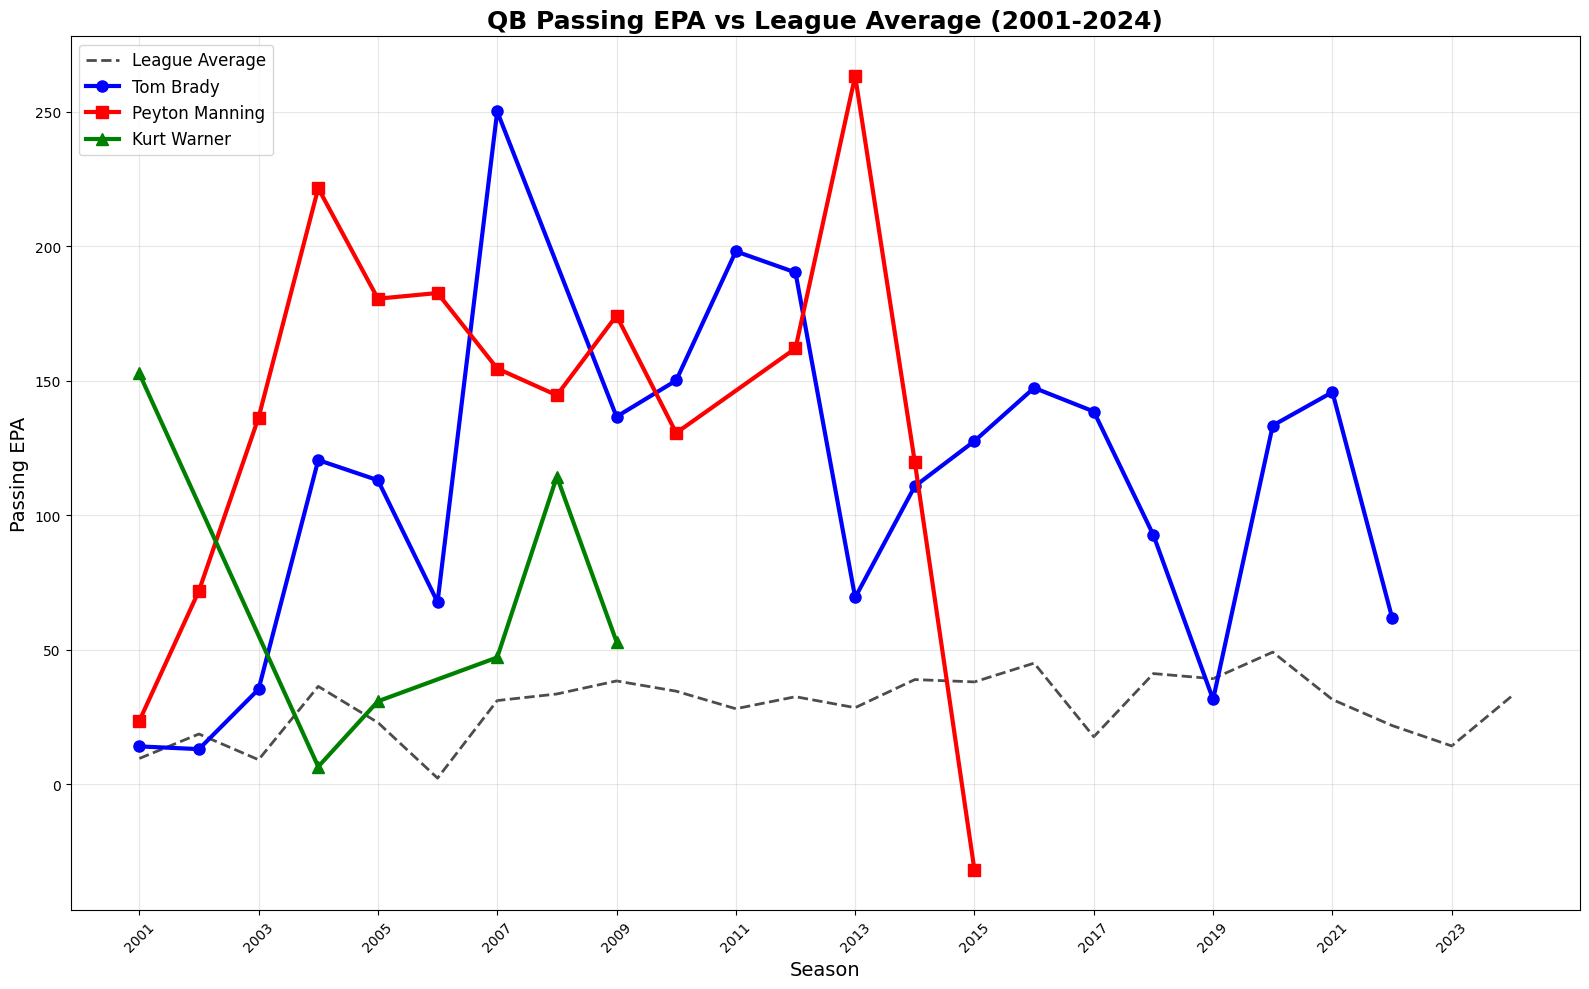

Plot saved


In [52]:
"""
Brady vs Manning vs Warner Passing EPA Analysis
Compares three QBs' passing EPA against league average
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load QB data
print("Loading QB data...")
qb_data = pd.read_csv('/Users/brucegavins/brady_supporting_cast_analysis/data/raw/qb_data_2001_2024.csv')
print(f"Total QB records: {len(qb_data):,}")

# Filter to qualified QBs only (250+ attempts) for league averages
qualified_qbs = qb_data[qb_data['qualified_season'] == True].copy()
print(f"Qualified QB seasons: {len(qualified_qbs):,}")

# Remove rows with null passing_epa values
qualified_qbs = qualified_qbs.dropna(subset=['passing_epa'])
print(f"QBs with valid passing EPA: {len(qualified_qbs):,}")

# Calculate league average passing EPA by season
league_avg_epa = qualified_qbs.groupby('season')['passing_epa'].mean().reset_index()
league_avg_epa.columns = ['season', 'league_avg_passing_epa']
print(f"League averages calculated for {len(league_avg_epa)} seasons")

# Find the three QBs
brady_data = qualified_qbs[qualified_qbs['player_name'] == 'Tom Brady'].copy()
manning_data = qualified_qbs[qualified_qbs['player_name'] == 'Peyton Manning'].copy()
warner_data = qualified_qbs[qualified_qbs['player_name'] == 'Kurt Warner'].copy()

print(f"Tom Brady seasons found: {len(brady_data)}")
print(f"Peyton Manning seasons found: {len(manning_data)}")
print(f"Kurt Warner seasons found: {len(warner_data)}")

# Prepare data for each player
player_data = {}
for name, data in [('Tom Brady', brady_data), ('Peyton Manning', manning_data), ('Kurt Warner', warner_data)]:
    if len(data) > 0:
        player_vs_league = data[['season', 'player_name', 'passing_epa']].merge(
            league_avg_epa, on='season', how='left'
        )
        player_vs_league['epa_above_average'] = player_vs_league['passing_epa'] - player_vs_league['league_avg_passing_epa']
        player_data[name] = player_vs_league

# Create the visualization
plt.figure(figsize=(16, 10))

# Plot league average as a line
plt.plot(league_avg_epa['season'], league_avg_epa['league_avg_passing_epa'], 
         'k--', linewidth=2, label='League Average', alpha=0.7, zorder=1)

# Define colors and styles for each player
player_styles = {
    'Tom Brady': {'color': 'blue', 'marker': 'o', 'linestyle': '-'},
    'Peyton Manning': {'color': 'red', 'marker': 's', 'linestyle': '-'},
    'Kurt Warner': {'color': 'green', 'marker': '^', 'linestyle': '-'}
}

# Plot each player's EPA
for player_name, data in player_data.items():
    if len(data) > 0:
        style = player_styles[player_name]
        plt.plot(data['season'], data['passing_epa'], 
                color=style['color'], marker=style['marker'], linestyle=style['linestyle'],
                linewidth=3, markersize=8, label=player_name, 
                markerfacecolor=style['color'], zorder=3)

# Formatting
plt.title('QB Passing EPA vs League Average (2001-2024)', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Passing EPA', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# Set x-axis to show every other year
seasons = league_avg_epa['season'].values
plt.xticks(seasons[::2], rotation=45)

plt.tight_layout()

# Save the plot
plt.savefig('/Users/brucegavins/brady_supporting_cast_analysis/results/figures/qb_epa_comparison_2001_2024.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved")